# IS620 Project 2
## Robert Sellers | October 17, 2016

### Bipartite (2-mode) Crime Cluster Network Analysis

**Concept:** [LINK TO WALKTHROUGH](https://blog.ouseful.info/2012/11/09/drug-deal-network-analysis-with-gephi-tutorial/)

**Data:** [LINK TO DATA](https://github.com/RobertSellers/620_WEB/blob/master/graphData/inventory.csv)

The following code walks through a csv dataset that was prepared with 2-nodes, the "attributes of a deal" and the customers. This results in columns of drug deal attributes (product type, minimum qty kg, discount, origin counts) and a binary matrix of whether or not the customers purchased these known drugs. 

## IMPORT MODULES

In [17]:
import networkx as nx
from networkx import *
import csv
import matplotlib.pyplot as plt
%matplotlib inline

## NETWORKX INITIALIZATION

In [4]:
#Create a directed graph in networkx
DG = nx.Graph()

## CONSTRUCT THE BIPARTITE GRAPH

In [16]:
#Open data file in universal newline mode
reader=csv.DictReader(open(dir+"C:/Users/Robert/Desktop/620_WEB/graphData/inventory.csv","rU"))

In [18]:
#Define a variable to act as a deal node ID counter
dcid=0
 
#Identify columns used to annotate nodes taking string values
nodeColsStr=['Offer date', 'Product', 'Origin', 'Ready for use']
#Identify columns used to annotate nodes taking numeric values
nodeColsInt=['Minimum Qty kg', 'Discount']
 
#The customers are treated as nodes in their own right, rather than as deal attributes
#Identify columns used to identify customers - each of these will define a customer node
customerCols=['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Miller', 'Davis', 'Garcia', 
              'Rodriguez', 'Wilson', 'Martinez', 'Anderson', 'Taylor', 'Thomas', 'Hernandez', 
              'Moore', 'Martin', 'Jackson', 'Thompson', 'White' ,'Lopez', 'Lee', 'Gonzalez','Harris', 
              'Clark', 'Lewis', 'Robinson', 'Walker', 'Perez', 'Hall', 'Young', 'Allen', 'Sanchez', 
              'Wright', 'King', 'Scott','Green','Baker', 'Adams', 'Nelson','Hill', 'Ramirez', 'Campbell', 
              'Mitchell', 'Roberts', 'Carter', 'Phillips', 'Evans', 'Turner', 'Torres', 'Parker', 'Collins', 
              'Edwards', 'Stewart', 'Flores', 'Morris', 'Nguyen', 'Murphy', 'Rivera', 'Cook', 'Rogers', 'Morgan', 
              'Peterson', 'Cooper', 'Reed', 'Bailey', 'Bell', 'Gomez', 'Kelly', 'Howard', 'Ward', 'Cox', 'Diaz', 
              'Richardson', 'Wood', 'Watson', 'Brooks', 'Bennett', 'Gray', 'James', 'Reyes', 'Cruz', 'Hughes', 
              'Price', 'Myers', 'Long', 'Foster', 'Sanders', 'Ross', 'Morales', 'Powell', 'Sullivan', 'Russell', 
              'Ortiz', 'Jenkins', 'Gutierrez', 'Perry', 'Butler', 'Barnes', 'Fisher']
 
#Create a node for each customer, and classify it as a 'customer' node type
for customer in customerCols:
    DG.add_node(customer,typ="customer")

Create subset for entities and countries nodes.

In [19]:
#Each row defines a deal
for row in reader:
    #Mint an ID for the deal
    dealID='deal'+str(dcid)
    #Add a node for the deal, and classify it as a 'deal' node type
    DG.add_node(dealID,typ='deal')
    #Annotate the deal node with string based deal attributes
    for deal in nodeColsStr:
        DG.node[dealID][deal]=row[deal]
    #Annotate the deal node with numeric based deal attributes
    for deal in nodeColsInt:
        DG.node[dealID][deal]=int(row[deal])
    #If the cell in a customer column is set to 1,
    ## draw an edge between that customer and the corresponding deal
    for customer in customerCols:
        if str(row[customer])=='1':
            DG.add_edge(dealID,customer)
    #Increment the node ID counter
    dcid=dcid+1
 
#write graph into Gephi Format
nx.write_graphml(DG,"inventory.graphml")

## NETWORKX ANALSIS

In [9]:
print nx.function.info(DG)

Name: 
Type: Graph
Number of nodes: 199
Number of edges: 676
Average degree:   6.7940


In [12]:
print(nx.bipartite.is_bipartite(DG))

True


In [11]:
nx.is_connected(DG)

False

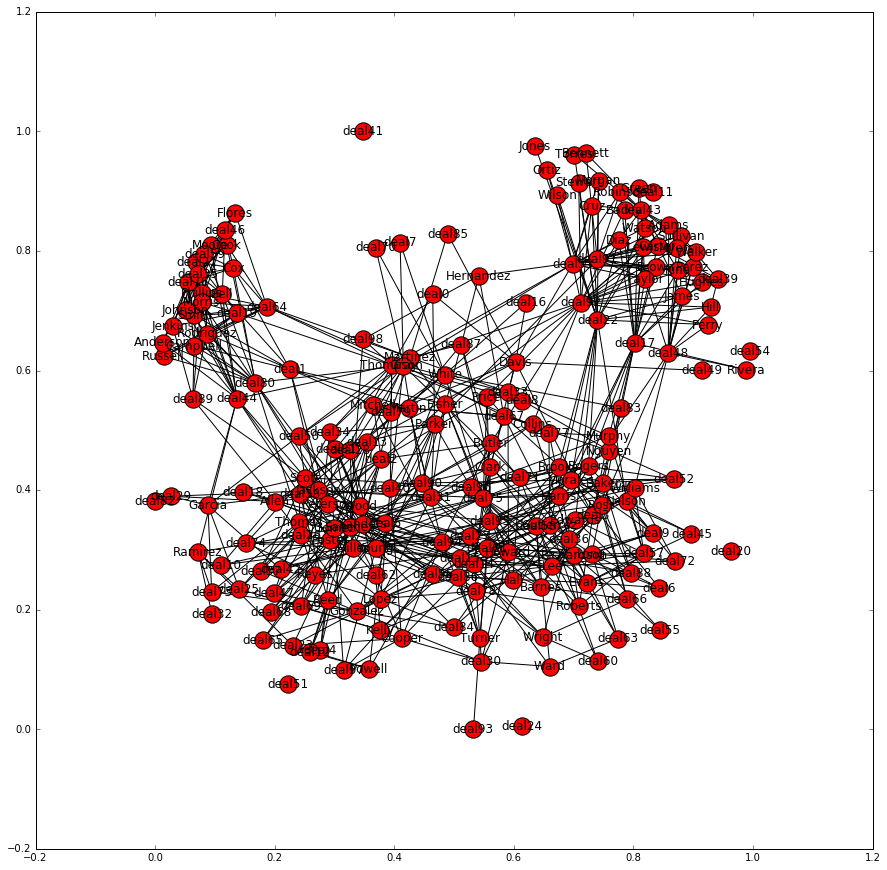

In [22]:
plt.figure(figsize=(15,15))
nx.draw_networkx(DG)
plt.show()

Visualizing the graph with centrality measures.  This is done to show the limitations of analysing these networks in a unimodal fashion.

Code found @ http://stackoverflow.com/questions/35417758/visualizing-graph-in-python-using-networkx/35708775.

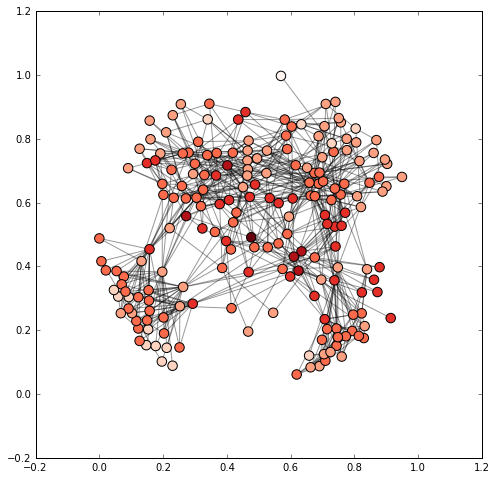

In [25]:
# Create a Spring Layout
pos=nx.spring_layout(DG)

# Find the center Node
dmin=1
ncenter=0
for n in pos:
   x,y=pos[n]
   d=(x-0.5)**2+(y-0.5)**2
   if d<dmin:
      ncenter=n
      dmin=d
    
p=nx.single_source_shortest_path_length(DG,ncenter)


plt.figure(figsize=(8,8))
nx.draw_networkx_edges(DG,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(DG,pos,nodelist=p.keys(),node_size=90,
   node_color=p.values(),cmap=plt.cm.Reds_r)

plt.show()

## GEPHI ANALYSIS

**Degree Centrality**

The following report shows disconnected nodes. Values equalling 0 are filtered.

![Degree Centrality](https://raw.githubusercontent.com/RobertSellers/620_WEB/master/Project2_GephiExports/Degree_Centrality/degree-distribution.png)

**Modularity**

The modularity statistic identifies communities. Gephi discovers 6 clusters of interconnected nodes. We can use this to color our nodes and further our analysis.

![Modularity](https://raw.githubusercontent.com/RobertSellers/620_WEB/master/Project2_GephiExports/modularity/communities-size-distribution.png)
![Modularity2](https://raw.githubusercontent.com/RobertSellers/620_WEB/master/Project2_GephiExports/modularity/image.png)

**Discussion**

Layout Used: Force Atlas 2

The modularity approach really helps us identify the various clusters around particular drug types and users. From this we can derive ideas about how best to track down drug networks, from a law enforcement perspective, who are the biggest addicts, what drugs are more exclusive, et cetera.

Take for example cocaine, which is most exclusive and independent from the rest of the drug network. This might imply both a propensity for singular addiction as well as a more independent source, wheras many of the other drugs seem more chaotically distributed.  

Given more time with this data, the additional parameters (e.g. Minimum Qty kg, Discount, Origin) could all be used to leverege this analysis beyond the scope of this python notebook. Furthermore, Gephi provides the ability to create "workspaces" and snapshots for the data, which could allow a more distributed approach to analysis rather than guiding 